# **ML Diabetes Predictor**

## **Importing necessary libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load datasets

In [4]:
training_data_path = '/content/drive/MyDrive/Data Set Diabetes/Training.csv'
testing_data_path = '/content/drive/MyDrive/Data Set Diabetes/Testing.csv'

train_df = pd.read_csv('/content/drive/MyDrive/Data Set Diabetes/Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Data Set Diabetes/Testing.csv')

### **Preprocess data and seperate features and target variable**

In [5]:
X_train = train_df.drop('Outcome', axis=1)
y_train = train_df['Outcome']
X_test = test_df.drop('Outcome', axis=1)
y_test = test_df['Outcome']


### **Scaling features**

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Split datasets**

In [7]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# **Initialize and train the logistic regression model**

In [8]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_final, y_train_final)

# Predict on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f'Validation Accuracy with XGBoost: {accuracy_val_xgb}')

# Predict on the test set
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f'Test Accuracy with XGBoost: {accuracy_test_xgb}')


Validation Accuracy with XGBoost: 0.9979674796747967
Test Accuracy with XGBoost: 0.762987012987013


## **Predict on the validation set and calculate the accuracy**



In [15]:
y_val_pred = log_reg.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val}')

Validation Accuracy: 0.7296747967479674


## **Predict on the test set and calculate accuracy**

In [16]:
y_test_pred = log_reg.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test}')

Test Accuracy: 0.8084415584415584


# **Visualization**

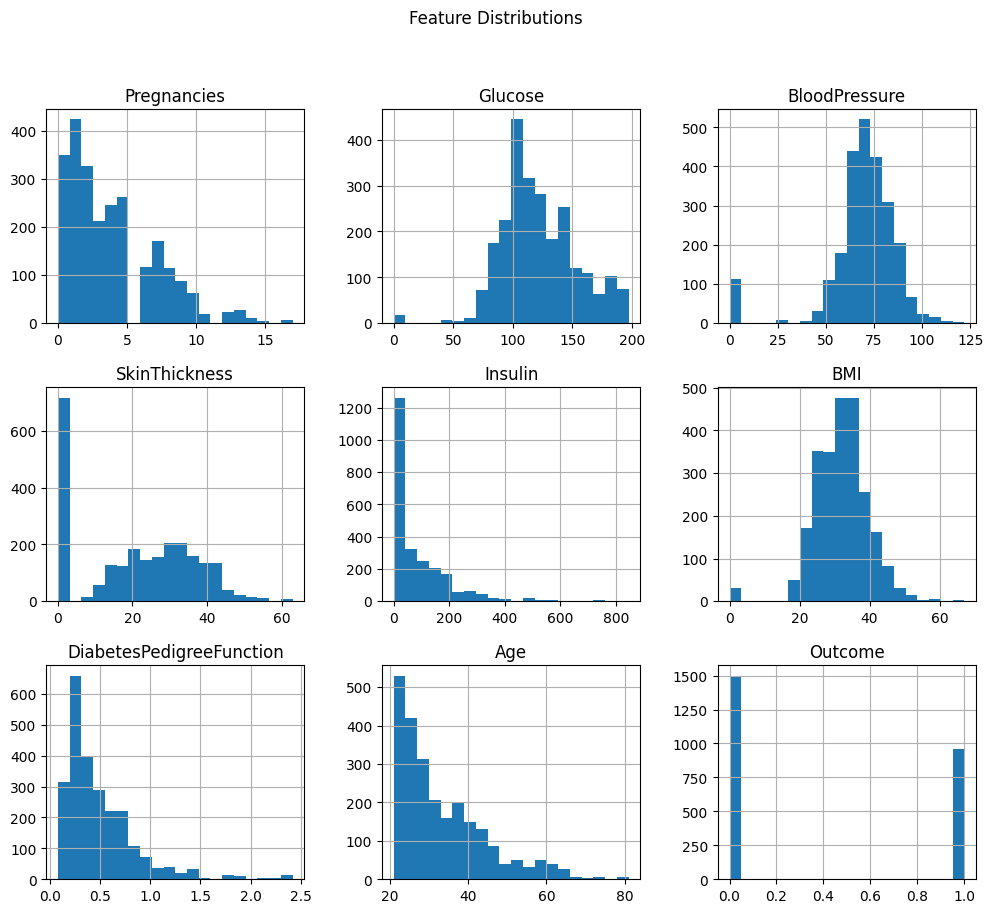

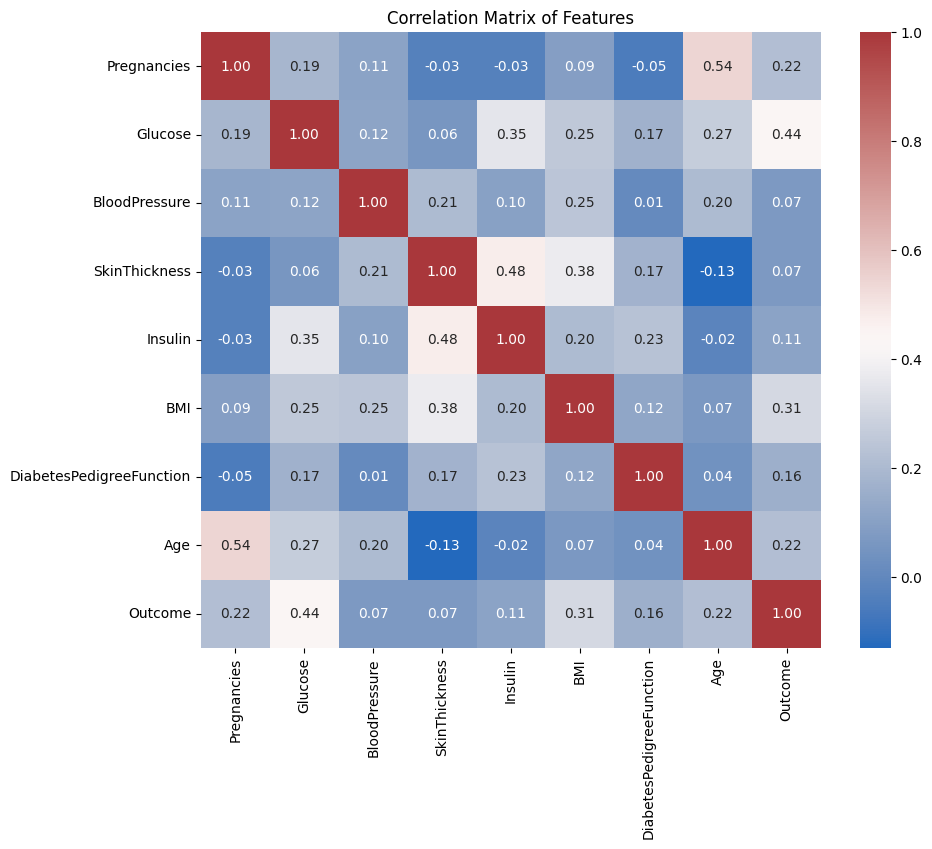

Confusion matrix, without normalization
[[191  24]
 [ 35  58]]
Normalized confusion matrix
[[0.89 0.11]
 [0.38 0.62]]


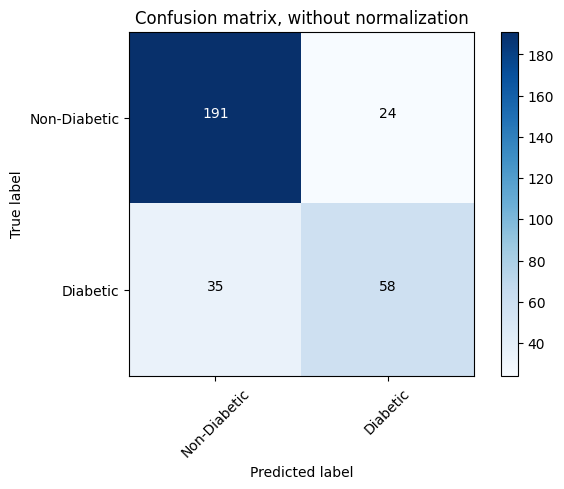

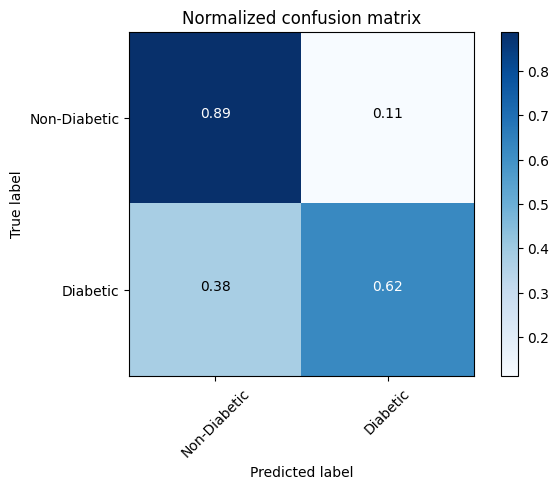

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Histograms for each feature
train_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

# 2. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title('Correlation Matrix of Features')
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 3. Confusion Matrix Visualization
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Diabetic', 'Diabetic'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Diabetic', 'Diabetic'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
